Total Profit by Product Category:
    Product_Category         Profit
30                45  756220.767190
12                17  494636.919791
28                43  427455.568106
6                  9  383011.098485
14                24  350421.029567
32                48  325146.960038
31                46  318451.430554
13                18  311902.820214
16                29  129813.960315
38                64   69656.810171
42                68   33443.010106
36                62   30289.799946
24                37   28626.479871
37                63   27178.099597
40                66   25531.170060
50                76   19102.849930
15                26   17288.569973
26                40   16643.520074
45                71   14436.319923
39                65   13223.399926
22                35   12975.490078
1                  3   12762.130067
47                73   12518.610119
20                33   12406.070143
10                13   12264.900047
43                69    9493.6

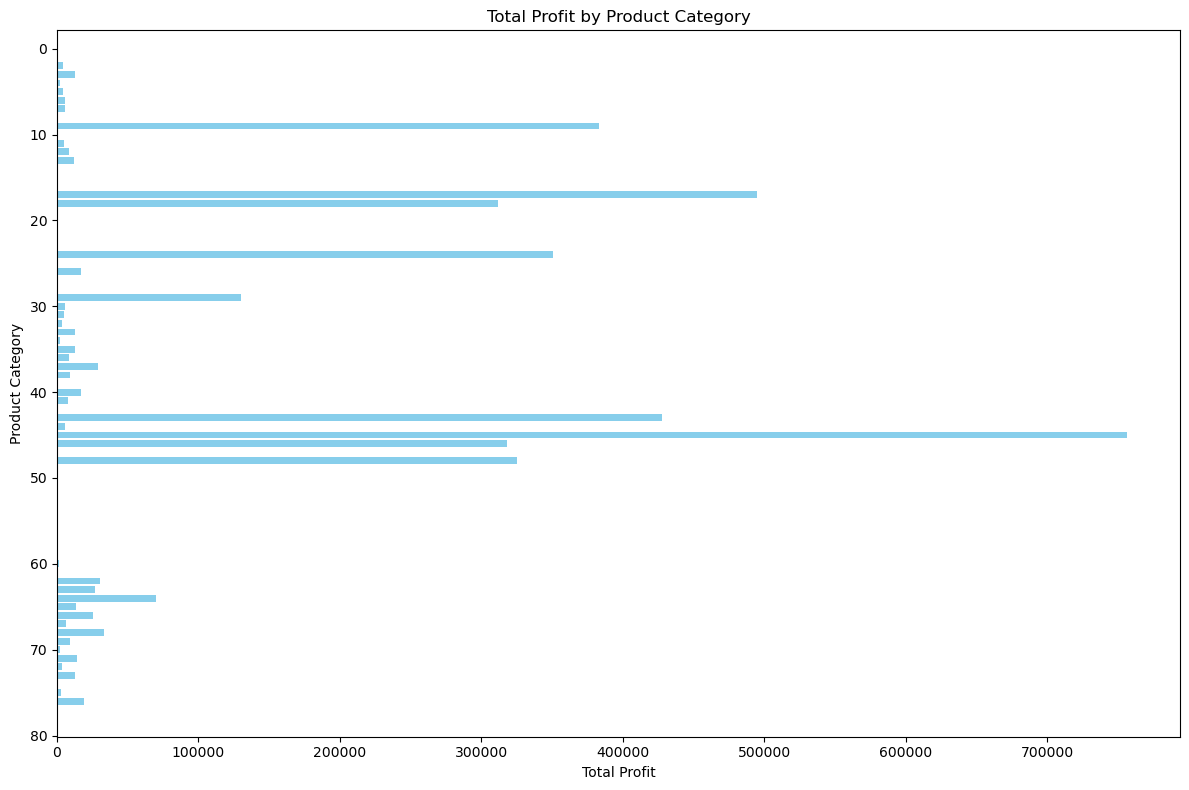

In [1]:
# EXPLORATORY DATA ANALYSIS 

# 1. Profit by Product Category

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset

df = pd.read_csv('cleaned_supplychain_dataset.csv')

# Summarize total profit by product category

category_profit = df.groupby('Product_Category')['Profit'].sum().reset_index()

# Sort by profit for better visualization

category_profit = category_profit.sort_values(by='Profit', ascending=False)

# Display the summary table

print("Total Profit by Product Category:")
print(category_profit)

# Suggest and create a visualization: Horizontal Bar Chart

plt.figure(figsize=(12, 8))
plt.barh(category_profit['Product_Category'], category_profit['Profit'], color='skyblue')
plt.xlabel('Total Profit')
plt.ylabel('Product Category')
plt.title('Total Profit by Product Category')
plt.gca().invert_yaxis()  # Most profitable at the top
plt.tight_layout()
plt.savefig('profit_by_category.png')

# Save the summary to CSV as well

category_profit.to_csv('category_profit_summary.csv', index=False)

Average Shipping Delay by Customer Country (Top 10):
  Customer Country  Average Shipping Delay
1      Puerto Rico                3.479798
0          EE. UU.                3.466899


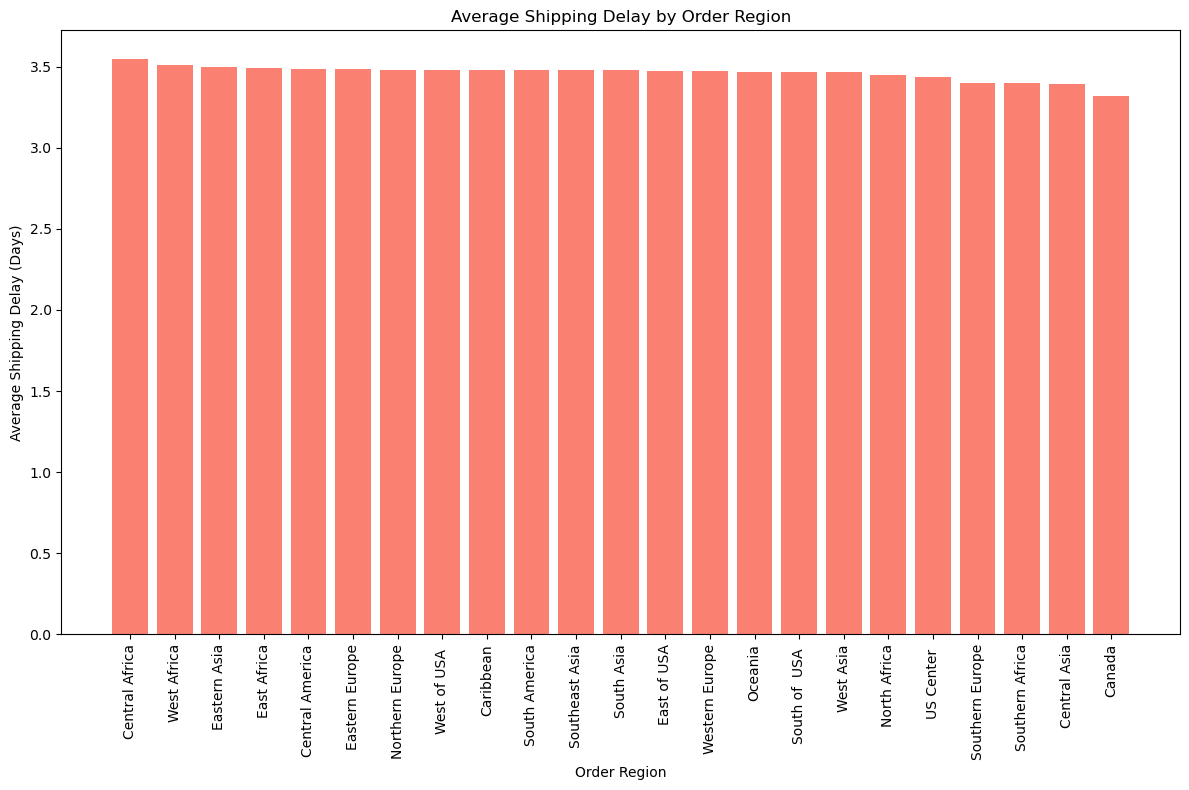

In [2]:
# 2. Shipping Delays by Country 

import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset

df = pd.read_csv('cleaned_supplychain_dataset.csv')

# Calculate average shipping delay by customer country

country_delay = df.groupby('Cust_Country')['shipping_delay'].mean().reset_index()
country_delay.columns = ['Customer Country', 'Average Shipping Delay']
country_delay = country_delay.sort_values(by='Average Shipping Delay', ascending=False)

# Calculate average shipping delay by order region (better for visualization/comparison)

region_delay = df.groupby('Order Region')['shipping_delay'].mean().reset_index()
region_delay.columns = ['Order Region', 'Average Shipping Delay']
region_delay = region_delay.sort_values(by='Average Shipping Delay', ascending=False)

# Display the summary for countries (top 10)

print("Average Shipping Delay by Customer Country (Top 10):")
print(country_delay.head(10))

# Suggest and create a visualization: Bar Chart for Regions

plt.figure(figsize=(12, 8))
plt.bar(region_delay['Order Region'], region_delay['Average Shipping Delay'], color='salmon')
plt.xlabel('Order Region')
plt.ylabel('Average Shipping Delay (Days)')
plt.title('Average Shipping Delay by Order Region')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('delay_by_region.png')

# Save results to CSV

country_delay.to_csv('average_delay_by_country.csv', index=False)
region_delay.to_csv('average_delay_by_region.csv', index=False)

Descriptive Statistics for Cost:
count    180519.000000
mean        141.232550
std         139.732492
min           9.990000
25%          50.000000
50%          59.990002
75%         199.990005
max        1999.989990
Name: Cost, dtype: float64
Skewness: 3.191019570200194


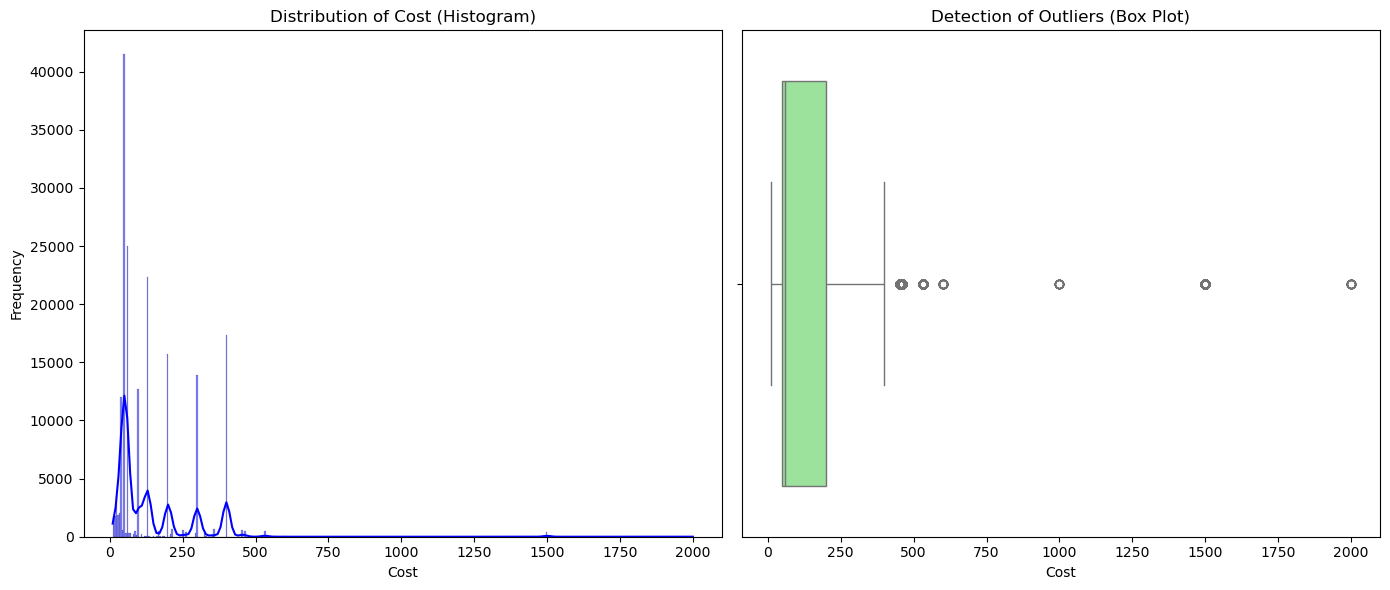

In [3]:
# 3. Cost Distribution 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset

df = pd.read_csv('cleaned_supplychain_dataset.csv')

# Descriptive statistics for Cost

cost_stats = df['Cost'].describe()
cost_skew = df['Cost'].skew()

print("Descriptive Statistics for Cost:")
print(cost_stats)
print(f"Skewness: {cost_skew}")

# Create visualizations

plt.figure(figsize=(14, 6))

# Histogram for skewness

plt.subplot(1, 2, 1)
sns.histplot(df['Cost'], kde=True, color='blue')
plt.title('Distribution of Cost (Histogram)')
plt.xlabel('Cost')
plt.ylabel('Frequency')

# Boxplot for outliers

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Cost'], color='lightgreen')
plt.title('Detection of Outliers (Box Plot)')
plt.xlabel('Cost')

plt.tight_layout()
plt.savefig('cost_distribution_analysis.png')

# Re-save stats for reference if needed

cost_summary = pd.DataFrame(cost_stats).transpose()
cost_summary['skewness'] = cost_skew
cost_summary.to_csv('cost_distribution_summary.csv', index=False)